In [ ]:
!pip install tensorflow==2.9.1

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
Updating files:  75% (1552/2050)
Updating files:  76% (1558/2050)
Updating files:  77% (1579/2050)
Updating files:  78% (1599/2050)
Updating files:  79% (1620/2050)
Updating files:  80% (1640/2050)
Updating files:  81% (1661/2050)
Updating files:  82% (1681/2050)
Updating files:  83% (1702/2050)
Updating files:  84% (1722/2050)
Updating files:  85% (1743/2050)
Updating files:  86% (1763/2050)
Updating files:  87% (1784/2050)
Updating files:  88% (1804/2050)
Updating files:  89% (1825/2050)
Updating files:  90% (1845/2050)
Updating files:  91% (1866/2050)
Updating files:  92% (1886/2050)
Updating files:  93% (1907/2050)
Updating files:  94% (1927/2050)
Updating files:  95% (1948/2050)
Updating files:  96% (1968/2050)
Updating files:  97% (1989/2050)
Updating files:  98% (2009/2050)
Updating files:  99% (2030/2050)
Updating files: 100% (2050/2050)
Updating files: 100% (2050/2050), done.


In [7]:
!pip install sed

In [10]:
!pip install make

In [ ]:
%cd ../

In [1]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile
!make

In [4]:
# Installation de la bibliothèque opencv-python
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


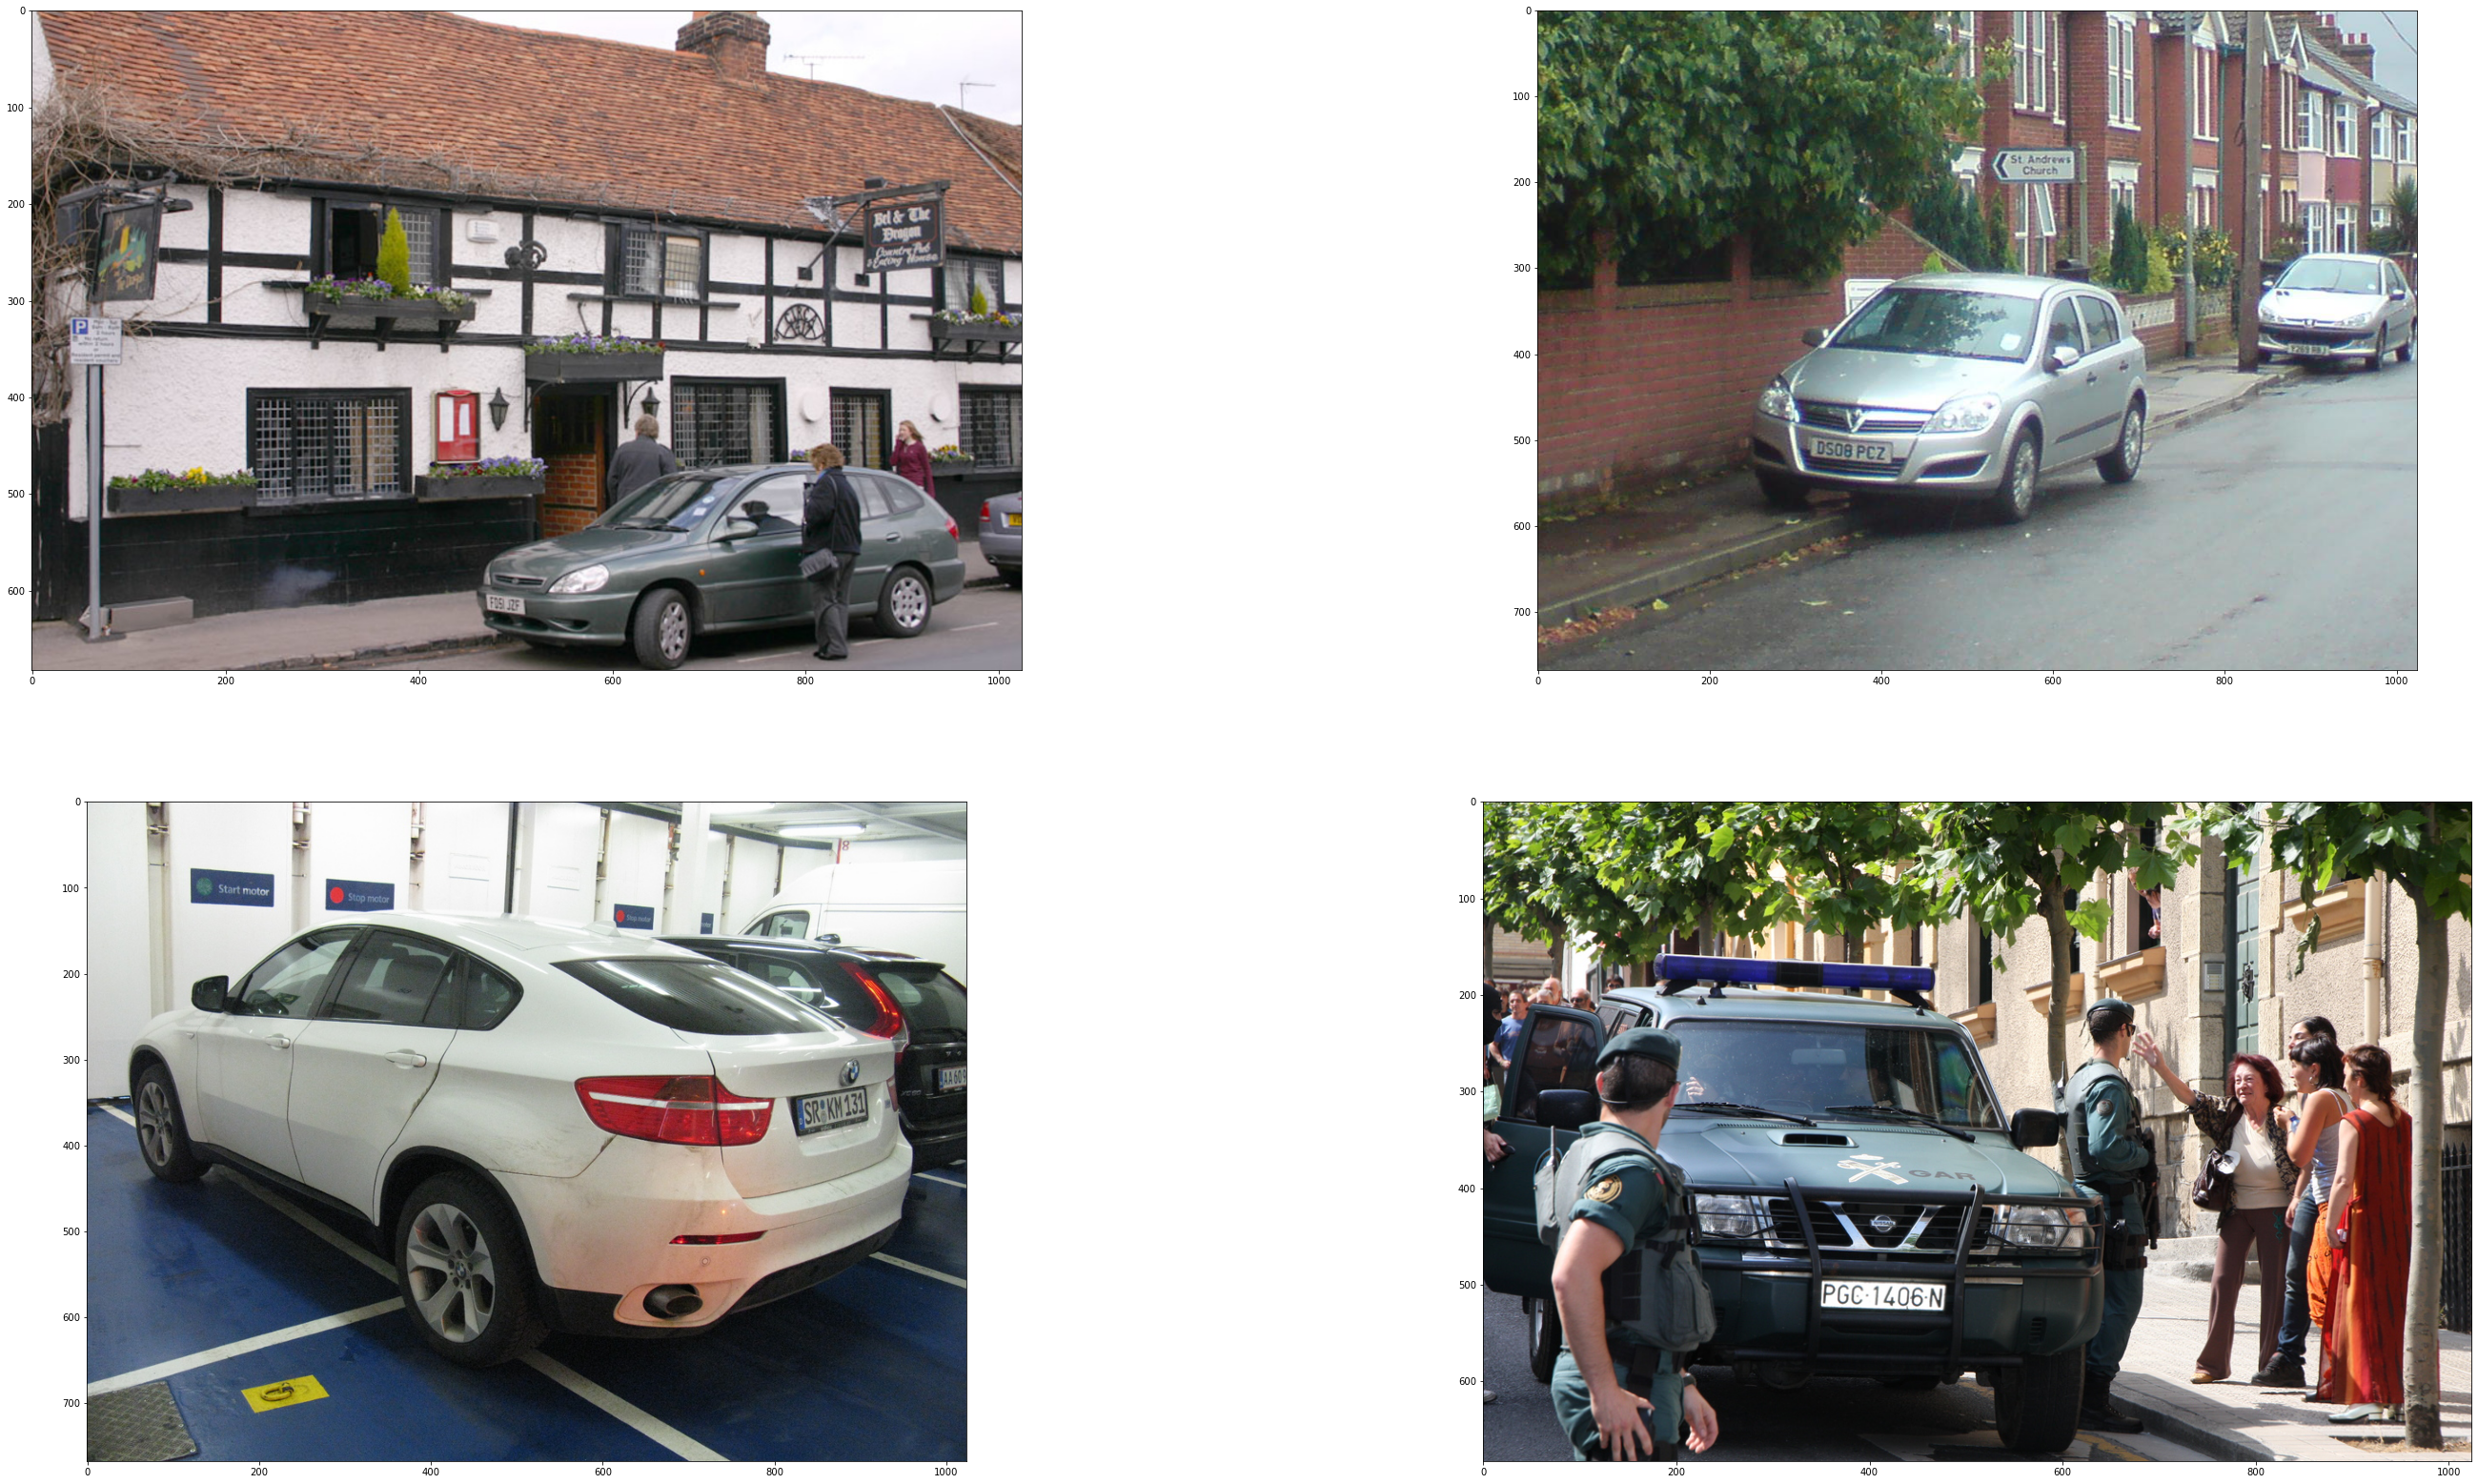

In [5]:
import math
import os
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline
# Création d'une liste de fichiers image du jeu de données.
data_path = 'C:/Users/Administrateur/train/'
files = os.listdir(data_path)
img_arr = []
 
# Ajout du tableau d'images à une liste.
num = 4
 
# Tracer les images à l'aide de matplotlib.
for fimg in files:
    if fimg.endswith('.jpg'):
        demo = img.imread(data_path+fimg)
        img_arr.append(demo)
        if len(img_arr) == num:
            break
 
# Tracer les images à l'aide de matplotlib.
_, axs = plt.subplots(math.floor(num/2), math.ceil(num/2), figsize=(50, 28))
 
axs = axs.flatten()

for cent, ax in zip(img_arr, axs):
    ax.imshow(cent)
plt.show()

In [6]:
# Création d'un point de contrôle de dossier pour enregistrer des poids pendant l'entraînement.
%cd ../
!mkdir checkpoint

C:\Users\Administrateur


A subdirectory or file checkpoint already exists.


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

In [9]:
def yolo_det(frame, config_file, data_file, batch_size, weights, threshold, output, network, class_names, class_colors, save = False, out_path = ''):
 
    prev_time = time.time()
   
    # Prétraitement de l'image d'entrée.
    width = darknet.network_width(network)
    height = darknet.network_height(network)
    darknet_image = darknet.make_image(width, height, 3)
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (width, height))

    # Passer l'image au détecteur et stocker les détections
    darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())
    detections = darknet.detect_image(network, class_names, darknet_image, thresh=threshold)
    darknet.free_image(darknet_image)

    # Tracer les détections à l'aide des fonctions intégrées de darknet

    image = darknet.draw_boxes(detections, image_resized, class_colors)
    print(detections)
    if save:
        im = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        file_name = out_path + '-det.jpg'
        cv2.imwrite(os.path.join(output, file_name), im)
 
    # Calcul du temps pris et FPS pour la détection
    det_time = time.time() - prev_time
    fps = int(1/(time.time() - prev_time))
    print("Temps : {}".format(det_time))

    # Redimensionnement de la boîte englobante prévue de 416x416 à la résolution de l'image d'entrée
    out_size = frame.shape[:2]
    in_size = image_resized.shape[:2]
    coord, scores = resize_bbox(detections, out_size, in_size)
    return coord, scores, det_time

In [10]:
def resize_bbox(detections, out_size, in_size):
    coord = []
    scores = []

  
    # Mise à l'échelle des boîtes englobantes en fonction de la résolution d'origine de l'image.
    for det in detections:
        points = list(det[2])
        conf = det[1]

        xmin, ymin, xmax, ymax = darknet.bbox2points(points)
        y_scale = float(out_size[0]) / in_size[0]
        x_scale = float(out_size[1]) / in_size[1]
        ymin = int(y_scale * ymin)
        ymax = int(y_scale * ymax)
        xmin = int(x_scale * xmin) if int(x_scale * xmin) > 0 else 0
        xmax = int(x_scale * xmax)

        final_points = [xmin, ymin, xmax-xmin, ymax-ymin]
        scores.append(conf)
        coord.append(final_points)

    return coord, scores

In [11]:
# Naviguer vers le répertoire précédent ou le répertoire personnel

# Installation des dépendances
!pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"

  Using cached paddlepaddle_gpu-2.3.0-cp39-cp39-win_amd64.whl (518.9 MB)
  Using cached paddle_bfloat-0.1.2-cp39-cp39-win_amd64.whl (39 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached paddleocr-2.5.0.3-py3-none-any.whl (334 kB)
  Using cached visualdl-2.2.3-py3-none-any.whl (2.7 MB)
  Using cached Shapely-1.8.2-cp39-cp39-win_amd64.whl (1.3 MB)
  Using cached opencv_contrib_python-4.4.0.46-cp39-cp39-win_amd64.whl (40.1 MB)
  Using cached python_Levenshtein-0.12.2-cp39-cp39-win_amd64.whl
  Using cached lmdb-1.3.0-cp39-cp39-win_amd64.whl (106 kB)
  Using cached attrdict-2.0.1-py2.py3-none-any.whl (9.9 kB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
  Using cached premailer-3.10.0-py2.py3-none-any.whl (19 kB)
  Using cached pyclipper-1.3.0.post3-cp39-cp39-win_amd64.whl (94 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached cssutils-2.4.2-py3-none-any.whl (404 kB)
  Using cached cssselect-1.1.0-py2.py3-none-any.whl 

In [12]:
from paddleocr import PaddleOCR
ocr = PaddleOCR(lang='en',rec_algorithm='CRNN')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to C:\Users\Administrateur/.paddleocr/whl\det\en\en_PP-OCRv3_det_infer\en_PP-OCRv3_det_infer.tar


100%|█████████████████████████████████████████████████████████████████████████████| 3.86M/3.86M [00:22<00:00, 173kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to C:\Users\Administrateur/.paddleocr/whl\rec\en\en_PP-OCRv3_rec_infer\en_PP-OCRv3_rec_infer.tar


100%|█████████████████████████████████████████████████████████████████████████████| 9.96M/9.96M [00:45<00:00, 219kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to C:\Users\Administrateur/.paddleocr/whl\cls\ch_ppocr_mobile_v2.0_cls_infer\ch_ppocr_mobile_v2.0_cls_infer.tar


100%|█████████████████████████████████████████████████████████████████████████████| 1.45M/1.45M [00:11<00:00, 127kiB/s]

[2022/06/26 16:40:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Administrateur/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='CRNN', rec_model_dir='C:\\Users\\Administrateur/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_

In [5]:
# Importation des bibliothèques et des fonctionnalités requises.
# Bibliothèques requises.
import os
import glob
import random
import time
import cv2
import numpy as np
import subprocess
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Variables stockant les couleurs et les polices.
font = cv2.FONT_HERSHEY_SIMPLEX
blue_color = (255,0,0)
white_color = (255,255,255)
black_color = (0,0,0)
green_color = (0,255,0)
yellow_color = (178, 247, 218)

In [19]:
# Variables stockant des couleurs et des polices.
font = cv2.FONT_HERSHEY_SIMPLEX
blue_color = (255,0,0)
white_color = (255,255,255)
black_color = (0,0,0)
green_color = (0,255,0)
yellow_color = (178, 247, 218)
def test_img(input, config_file, weights, out_path):
    # Chargement du réseau et des classes darknet avec les couleurs bbox.
    network, class_names, class_colors = darknet.load_network(
        config_file,
        data_file,
        weights,
        batch_size= batch_size
    )
   
  #  Lecture de l'image et réalisation de la détection YOLOv4.
    img = cv2.imread(input)
    bboxes, scores, det_time = yolo_det(img, config_file, data_file, batch_size, weights, thresh, out_path, network, class_names, class_colors)
 
  # Extraction ou recadrage de la plaque d'immatriculation et application de l'OCR.
    for bbox in bboxes:
        bbox = [bbox[0], bbox[1], bbox[2]- bbox[0], bbox[3] - bbox[1]]
        cr_img = crop(img, bbox)
        result = ocr.ocr(cr_img, cls=False, det=False)
        ocr_res = result[0][0]
        rec_conf = result[0][1]

        # Tracer les prédictions à l'aide d'OpenCV.
        (label_width,label_height), baseline = cv2.getTextSize(ocr_res , font, 2, 3)
        top_left = tuple(map(int,[int(bbox[0]),int(bbox[1])-(label_height+baseline)]))
        top_right = tuple(map(int,[int(bbox[0])+label_width,int(bbox[1])]))
        org = tuple(map(int,[int(bbox[0]),int(bbox[1])-baseline]))

        cv2.rectangle(img, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), blue_color, 2)
        cv2.rectangle(img, top_left, top_right, blue_color,-1)
        cv2.putText(img, ocr_res, org, font, 2, white_color,3)

    # Écriture de l'image de sortie.
    file_name = out_path + 'resultat_' + input
    cv2.imwrite(file_name, img)

In [ ]:
%cd ./darknet
import darknet
from darknet_images import load_images
from darknet_images import image_detection

In [ ]:
%cd ../

# Chemin du fichier de configuration de YOLOv4.
config_file = 'C:/Users/Administrateur/darknet/cfg/yolov4-obj.cfg'
# # Chemin du fichier obj.data.
data_file = 'C:/Users/Administrateur/darknet/data/obj.data'
# Taille du lot de données transmises au détecteur.
batch_size = 1
# Chemin vers les poids du YOLOv4 entraînés.
weights = 'C:/Users/Administrateur/checkpoint/yolov4-obj_best.weights'
# Seuil de confiance.
thresh = 0.6

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage import io


folder = 'C:/Users/Administrateur/validation'
out_path = 'C:/Users/Administrateur/resultats'


for dirname, dirs, files in os.walk(folder):
    for filename in files:
        filename_without_extension, extension = os.path.splitext(filename)
        if extension == '.png':
            input_dir = 'C:/Users/Administrateur/validation/'+filename
            # Charger l'image
            img = cv2.imread(input_dir)
            
            #Appel de la fonction
            test_img(input_dir, config_file, weights,out_path)

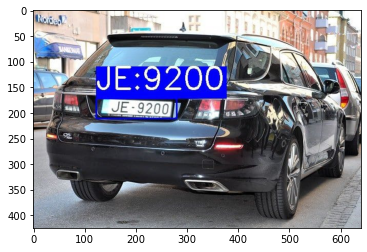

In [17]:
#Affichage des resultats
import matplotlib.image as mpimg
folder =  'C:/Users/Administrateur/resultat'

for dirname, dirs, files in os.walk(folder):
    for filename in files:
        filename_without_extension, extension = os.path.splitext(filename)
        if extension == '.jpg':
            image = mpimg.imread(filename)
            plt.imshow(image)
            plt.show()